# Statistical Analysis

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib
import scipy.stats
import math


### Particle swarm optimisation

In [127]:
swarm_stats = pd.read_csv("stats.csv")

In [128]:
swarm_stats

,Unnamed: 0,epoch,min_cost,max_cost,mean_cost,std_cost
0,0,0,4.227988,13.818251,9.060399,1.744030
1,1,1,4.083490,12.227068,8.399023,1.531519
2,2,2,3.952403,11.482544,7.865558,1.433634
3,3,3,3.867681,9.111485,7.282554,1.122294
4,4,4,3.742220,8.482574,6.695230,1.155619
...,...,...,...,...,...,...
95,95,95,0.916929,1.775341,1.462230,0.368971
96,96,96,0.888881,1.737753,1.402160,0.371656
97,97,97,0.878995,1.674994,1.344813,0.356151
98,98,98,0.889942,1.625300,1.277595,0.341545


No handles with labels found to put in legend.


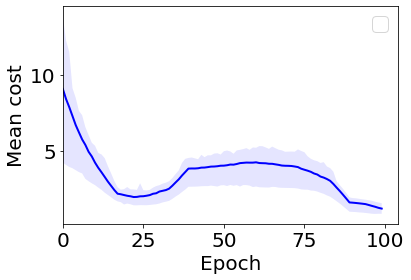

In [129]:
fig, ax = plt.subplots(1)
ax.plot(swarm_stats["epoch"], swarm_stats["mean_cost"], lw=2, color="blue")
ax.fill_between(
    swarm_stats["epoch"],
    swarm_stats["min_cost"],
    swarm_stats["max_cost"],
    facecolor="blue",
    alpha=0.1,
    )

ax.legend(loc="upper right")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean cost")
ax.set_xlim(xmin=0)
plt.savefig("minmax_cost", dpi=200)

### Experimental result analysis

In [130]:
FIFO = pd.read_csv("FIFO.csv")
FIFO_Rcfg = pd.read_csv("FIFO_reconfig.csv")
FIFO_Poff = pd.read_csv("FIFO_power_off.csv")
FIFO_Rcfg_Poff = pd.read_csv("fifo_reconf_powoff.csv")
random_param = pd.read_csv("random_params.csv")
swarm_param = pd.read_csv("swarm_params.csv")

In [131]:
all_data = [FIFO, FIFO_Rcfg, FIFO_Poff, FIFO_Rcfg_Poff, random_param, swarm_param]
all_data_labels = ['FIFO', 'FIFO-Rcfg', 'FIFO-Poff', 'FIFO-Rcfg-Poff', 'Rand-Param', 'Swarm']

## Sample data

In [132]:
FIFO

,Unnamed: 0,start_time,end_time,work_duration,reconfig_count,power_off_count,min_stretch_time,max_stretch_time,mean_stretch_time,stdev_stretch_time,average_power_norm,cost
0,0,240,24877.963950,24637.963950,0,0,0.185845,279.914364,12.161179,46.391737,1.512612,18.395143
1,1,340,25215.285599,24875.285599,0,0,0.204306,280.059959,12.158522,46.356213,1.506303,18.314414
2,2,2030,25767.328671,23737.328671,0,0,0.144323,278.795287,11.913688,46.235762,1.530018,18.228161
3,3,100,23971.076097,23871.076097,0,0,0.145565,278.819478,11.906579,46.241839,1.518629,18.081679
4,4,1130,24104.537694,22974.537694,0,0,0.194630,279.983579,12.132026,46.346309,1.540624,18.690896
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,870,22567.926909,21697.926909,0,0,0.154306,51.958059,3.697474,9.289839,1.613560,5.966097
96,96,590,21707.926909,21117.926909,0,0,0.166627,51.841117,3.688033,9.265204,1.627821,6.003457
97,97,490,21127.926909,20637.926909,0,0,0.173789,51.906318,3.688096,9.281803,1.644711,6.065852
98,98,330,20763.289782,20433.289782,0,0,0.133237,51.937252,3.721435,9.282172,1.629402,6.063714


## Reconfiguration

In [133]:
for i in range(len(all_data)):
    print('{} : {}'.format(all_data_labels[i],all_data[i]['reconfig_count'].mean() ))

FIFO : 0.0
FIFO-Rcfg : 3.07
FIFO-Poff : 0.0
FIFO-Rcfg-Poff : 13.3
Rand-Param : 3.69
Swarm : 0.0


## Power off

In [134]:
for i in range(len(all_data)):
    print('{} : {}'.format(all_data_labels[i],all_data[i]['power_off_count'].mean() ))

FIFO : 0.0
FIFO-Rcfg : 0.0
FIFO-Poff : 228.38
FIFO-Rcfg-Poff : 458.51
Rand-Param : 82.92
Swarm : 139.11


## Histograms

In [135]:
def hist(data, xlabel, h_size = 15, v_size =10):
    nb = 20
    fig, axs = plt.subplots(2, 3, figsize=(h_size,v_size))
    plt.rcParams.update({'font.size': 20})
    for i in range(len(all_data)):
        if i<3:
            r = 0
        else:
            r = 1
        axs[r, i%3].hist(all_data[i][data], bins=nb)
        axs[r, i%3].set_title(all_data_labels[i])
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel='Frequency')
    fig.tight_layout()

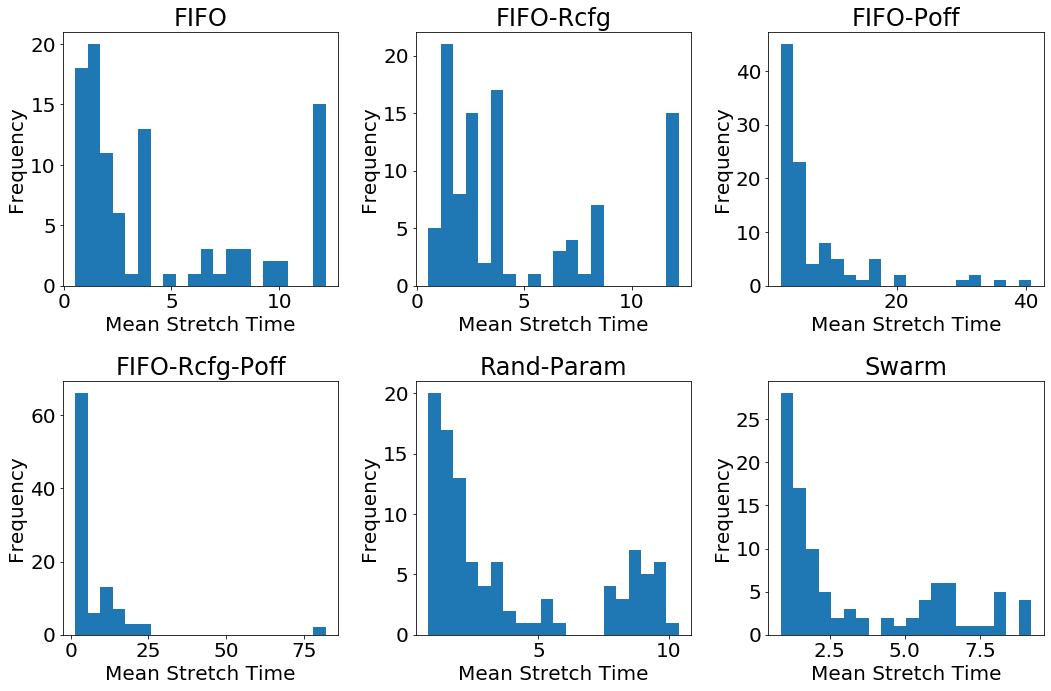

In [136]:
hist('mean_stretch_time', 'Mean Stretch Time')

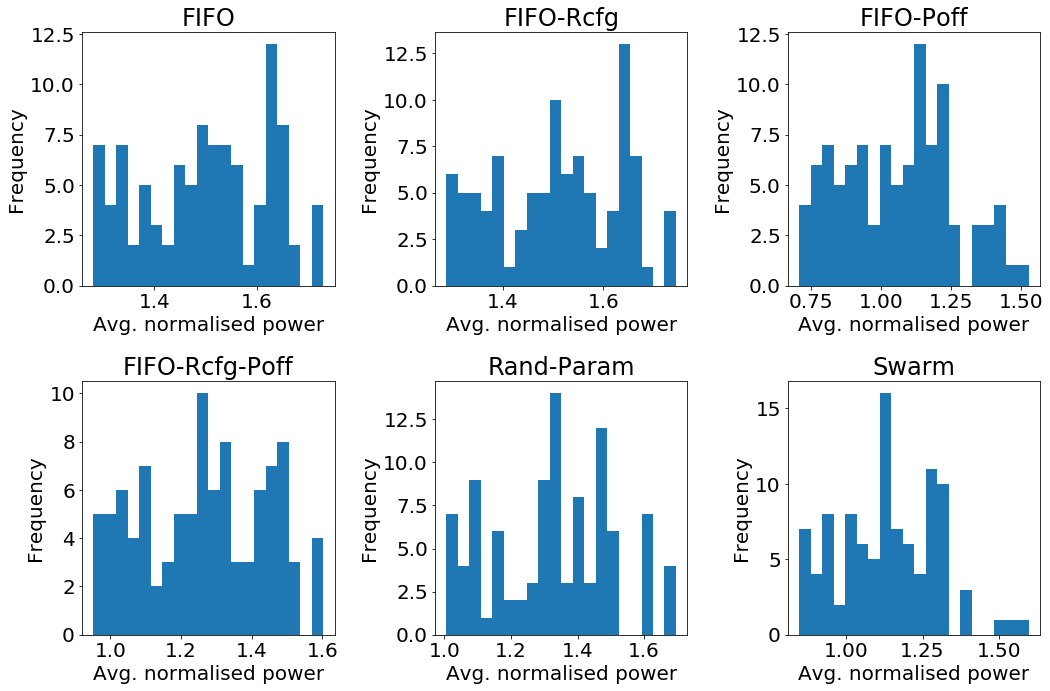

In [137]:
hist('average_power_norm','Avg. normalised power')

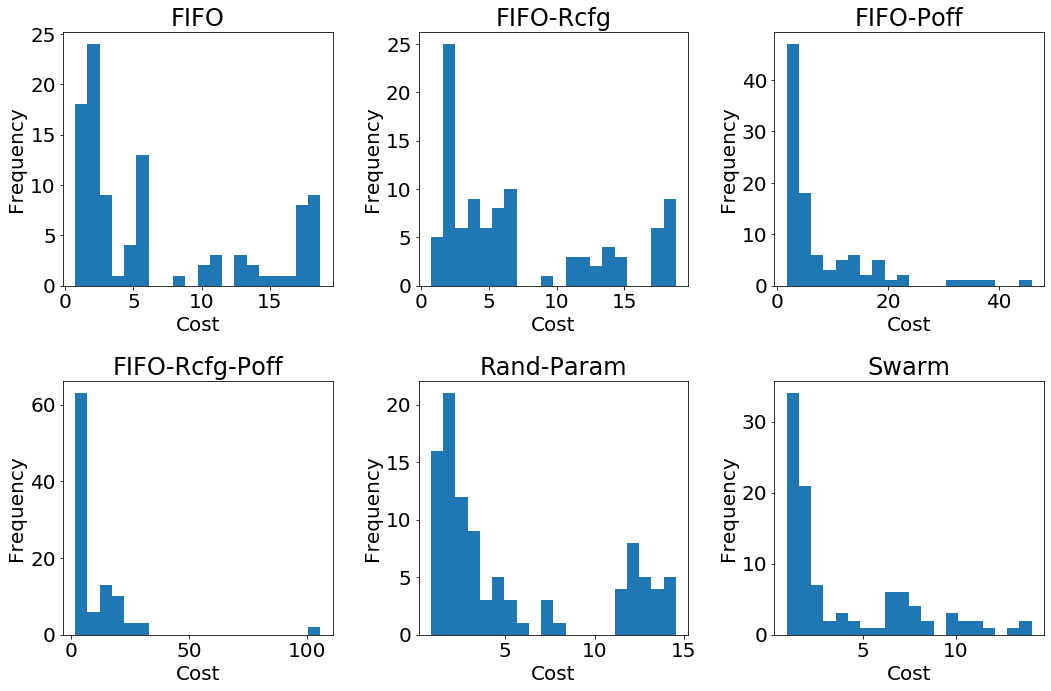

In [138]:
hist('cost', 'Cost')

## Boxplots

In [139]:
def box_plot(data, xlabel, h_size = 10, v_size =6):
    fig, ax = plt.subplots(figsize=(h_size,v_size))
    ax.set_ylabel(xlabel)
    ax.boxplot([df[data] for df in all_data], 0, '')
    ax.set_xticklabels(all_data_labels,
                        rotation=25)
    plt.show() 

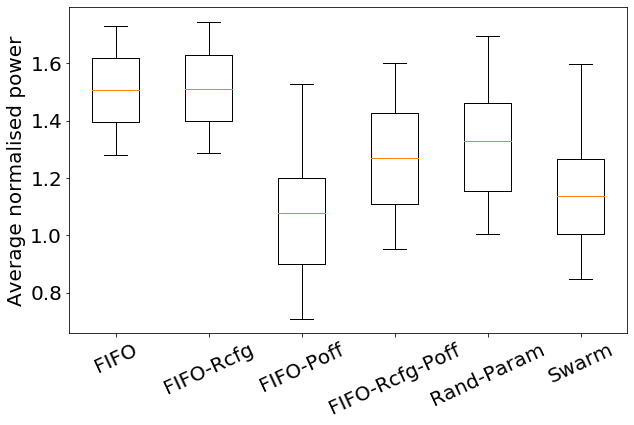

In [140]:
box_plot('average_power_norm', 'Average normalised power')

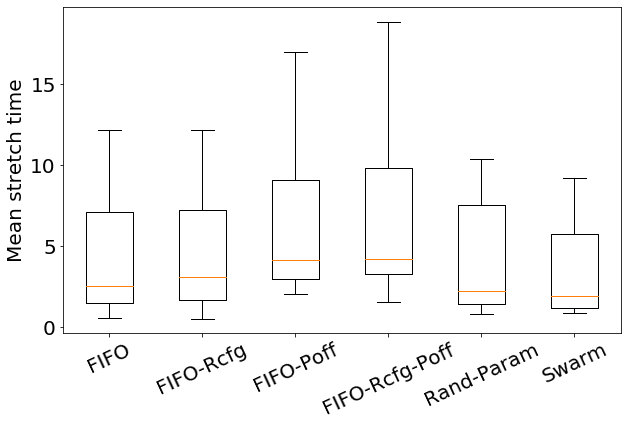

In [141]:
box_plot('mean_stretch_time', 'Mean stretch time')

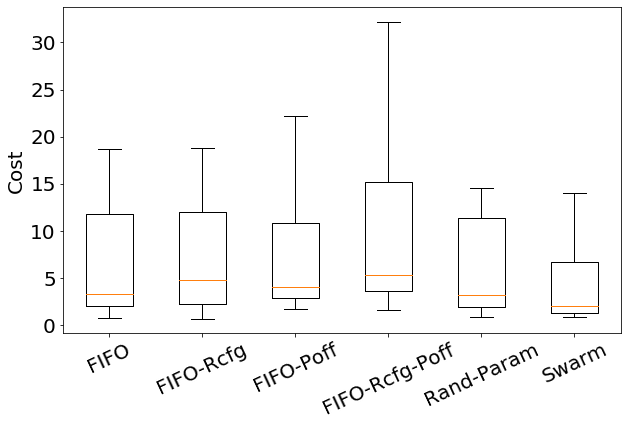

In [142]:
box_plot('cost', 'Cost')

## Pairwise comparaison

In [143]:
def compare_row(row, col1, col2):
    if row[col1] < row[col2]:
        val = 1
    else: 
        val = 0
    return val

In [144]:
def pairwise_comp(df1, df2, col_name):
    df = pd.concat([df1[col_name], df2[col_name]], axis=1, keys=['col1', 'col2'])
    df['comparaison'] = df.apply(compare_row, args=('col1', 'col2'), axis=1)
    return df['comparaison'].sum()

In [145]:
combis = itertools.combinations([0,1,2,3,4,5], 2)
combs = []
for c in combis:
    combs.append([c[0], c[1]])


In [146]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-15, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("white", "black"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [147]:
def make_heatmap(heat_data):    
    fig, ax = plt.subplots(figsize=(7,7))

    im = heatmap(heat_data, all_data_labels, all_data_labels, ax=ax,
                       cmap="inferno")
    texts = annotate_heatmap(im, valfmt="{x:.0f} ")

    fig.tight_layout()
    plt.show()

In [148]:
combis = itertools.combinations([0,1,2,3,4,5], 2)
pc = []
for c in combis:
    pc.append(pairwise_comp(all_data[c[0]],all_data[c[1]], 'mean_stretch_time'))
for i in range(len(combs)):
    print(str(combs[i]) + ': ' + str(pc[i]))

[0, 1]: 75
[0, 2]: 85
[0, 3]: 93
[0, 4]: 54
[0, 5]: 40
[1, 2]: 86
[1, 3]: 90
[1, 4]: 36
[1, 5]: 27
[2, 3]: 61
[2, 4]: 4
[2, 5]: 1
[3, 4]: 4
[3, 5]: 2
[4, 5]: 34


In [149]:
heat_stretch = np.array([
    [0, 75,  85,  93,  54,  40],
    [25,  0, 86,  90,  36,  27],
    [15,  14,  0, 61,  4,   1],
    [7,  10,  39,  0, 4,   2],
    [46,  64,  96,   96,   0, 34],
    [60,  73,  99,   98,   66,  0]
])

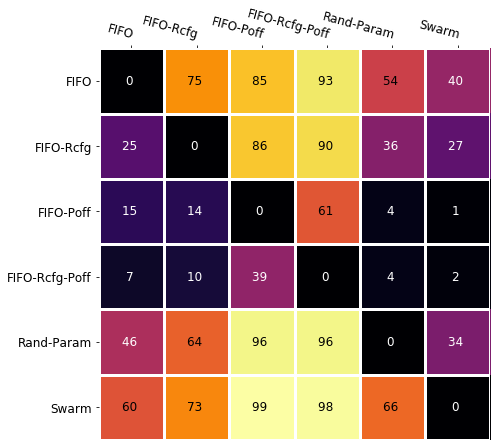

In [150]:
plt.rcParams.update({'font.size': 12})
make_heatmap(heat_stretch)

In [151]:
combis = itertools.combinations([0,1,2,3,4,5], 2)
pc = []
for c in combis:
    pc.append(pairwise_comp(all_data[c[0]],all_data[c[1]], 'average_power_norm'))
for i in range(len(combs)):
    print(str(combs[i]) + ': ' + str(pc[i]))

[0, 1]: 100
[0, 2]: 0
[0, 3]: 0
[0, 4]: 0
[0, 5]: 0
[1, 2]: 0
[1, 3]: 0
[1, 4]: 0
[1, 5]: 0
[2, 3]: 100
[2, 4]: 100
[2, 5]: 83
[3, 4]: 87
[3, 5]: 3
[4, 5]: 0


In [152]:
heat_power = np.array([
    [0, 100,  0,  0,  0,  0],
    [0,  0, 0,  0,  0,  0],
    [100,  100,  0, 100,  100,   83],
    [100,  100,  0,  0, 87,   3],
    [100,  100,  0,   13,   0, 0],
    [100,  100,  17,   97,  100,  0]
])

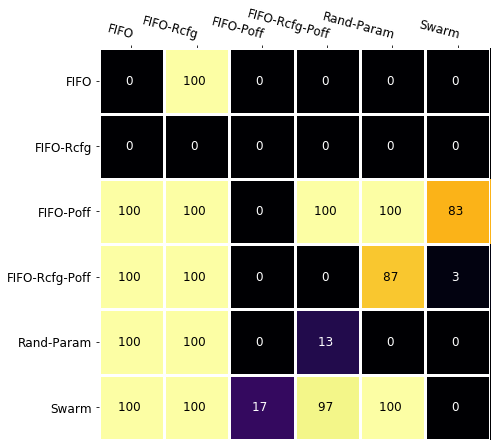

In [153]:
make_heatmap(heat_power)

In [154]:
combis = itertools.combinations([0,1,2,3,4,5], 2)
pc = []
for c in combis:
    pc.append(pairwise_comp(all_data[c[0]],all_data[c[1]], 'cost'))
for i in range(len(combs)):
    print(str(combs[i]) + ': ' + str(pc[i]))

[0, 1]: 87
[0, 2]: 73
[0, 3]: 85
[0, 4]: 45
[0, 5]: 25
[1, 2]: 57
[1, 3]: 85
[1, 4]: 21
[1, 5]: 13
[2, 3]: 78
[2, 4]: 15
[2, 5]: 4
[3, 4]: 5
[3, 5]: 2
[4, 5]: 16


In [155]:
heat_cost = np.array([
    [0,  87, 73,  85,  45,  25],
    [13,  0, 57,  85, 21,  13],
    [27,  43,  0, 78,  15,   4],
    [15,  15,  22,  0, 5,   2],
    [55,  79,  85,   95,   0, 16],
    [75,  87,  96,   98,   84,  0]
])

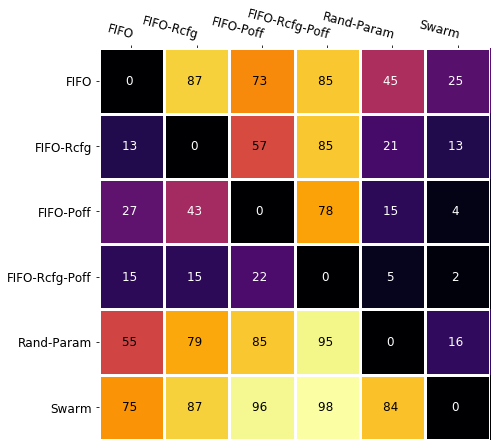

In [156]:
make_heatmap(heat_cost)

# Ranks

### Friedman chi-square calculation

In [157]:
scipy.stats.friedmanchisquare(*[d['cost'] for d in all_data])

FriedmanchisquareResult(statistic=268.04571428571444, pvalue=7.355231491209228e-56)

In [158]:
rank_df = pd.DataFrame(columns=[label for label in all_data_labels])
for i in range(len(all_data[0].index)):
    r = scipy.stats.rankdata([d['cost'][i] for d in all_data])
    rank_df.loc[i] = r
rank_df

,FIFO,FIFO-Rcfg,FIFO-Poff,FIFO-Rcfg-Poff,Rand-Param,Swarm
0,3.0,4.0,6.0,5.0,2.0,1.0
1,3.0,4.0,6.0,5.0,2.0,1.0
2,3.0,4.0,5.0,6.0,2.0,1.0
3,4.0,5.0,2.0,6.0,3.0,1.0
4,3.0,4.0,5.0,6.0,2.0,1.0
...,...,...,...,...,...,...
95,5.0,6.0,3.0,4.0,2.0,1.0
96,4.0,5.0,6.0,3.0,1.0,2.0
97,5.0,6.0,3.0,4.0,2.0,1.0
98,5.0,6.0,3.0,4.0,2.0,1.0


### Mean ranks

In [159]:
mean_ranks = [rank_df[col].mean() for col in all_data_labels]
for i in range(len(ranks)):
    print('{} : {}'.format(all_data_labels[i],mean_ranks[i]))

FIFO : 2.85
FIFO-Rcfg : 4.11
FIFO-Poff : 4.33


### Standard Error

In [160]:
SE = math.sqrt(6*7/(6*100))
SE

0.2645751311064591

### p-value

In [162]:
hypo_df = pd.DataFrame(columns=['Hypothesis', 'z', 'p'])
for i in range(len(combs)):
    h = str(all_data_labels[combs[i][0]]) + ' vs. ' + str(all_data_labels[combs[i][1]])
    z = (abs(mean_ranks[combs[i][0]]-mean_ranks[combs[i][1]])/SE)
    p = (1-scipy.stats.norm.cdf(z))*2
    hypo_df.loc[i] = [h,z,p]
hypo_df = hypo_df.sort_values(by=['p']).reset_index(drop=True)
hypo_df = hypo_df.round({'z':3})
hypo_df

,Hypothesis,z,p
0,FIFO vs. FIFO-Rcfg-Poff,9.676,0.000000e+00
1,FIFO-Rcfg vs. Swarm,9.487,0.000000e+00
2,FIFO-Poff vs. Swarm,10.318,0.000000e+00
3,FIFO-Rcfg-Poff vs. Rand-Param,10.243,0.000000e+00
4,FIFO-Rcfg-Poff vs. Swarm,14.400,0.000000e+00
5,FIFO-Poff vs. Rand-Param,6.161,7.236880e-10
6,FIFO vs. FIFO-Poff,5.594,2.220579e-08
7,FIFO-Rcfg vs. Rand-Param,5.329,9.859253e-08
8,FIFO-Rcfg vs. FIFO-Rcfg-Poff,4.914,8.944732e-07
9,FIFO vs. FIFO-Rcfg,4.762,1.913492e-06


## Resilience test

In [163]:
swarm_res = pd.read_csv("param_stats_resilience.csv")
random_res = pd.read_csv("random_resilience.csv")
fifo_res = pd.read_csv("all_false_stats_res.csv")
res_data = [fifo_res, random_res, swarm_res]
res_label = ['FIFO', 'Rand-Param', 'Swarm']

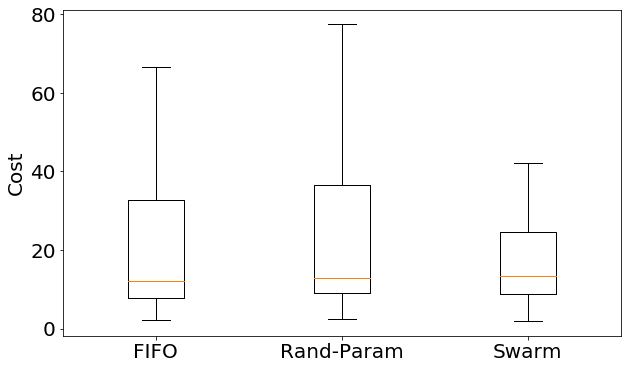

In [164]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Cost')
ax.boxplot([df['cost'] for df in res_data], 0, '')
ax.set_xticklabels(res_label,
                    rotation=0)
plt.show()


### Avg reconfigurations

In [165]:
for i in range(len(res_label)):
    print('{} : {}'.format(res_label[i],res_data[i]['reconfig_count'].mean() ))

FIFO : 0.0
Rand-Param : 2.92
Swarm : 7.53


### Avg power offs

In [166]:
for i in range(len(res_label)):
    print('{} : {}'.format(res_label[i],res_data[i]['power_off_count'].mean() ))

FIFO : 0.0
Rand-Param : 20.27
Swarm : 87.32


### Ranking

In [167]:
rank_df = pd.DataFrame(columns=[label for label in res_label])
for i in range(len(res_data[0].index)):
    r = scipy.stats.rankdata([d['cost'][i] for d in res_data])
    rank_df.loc[i] = r

In [168]:
scipy.stats.friedmanchisquare(*[rank_df[col] for col in res_label])

FriedmanchisquareResult(statistic=11.180000000000064, pvalue=0.003735027864687948)

In [169]:
ranks = [rank_df[col].mean() for col in res_label]
ranks

[1.73, 2.17, 2.1]

In [170]:
combis = itertools.combinations([0,1,2], 2)
combs = []
for c in combis:
    combs.append([c[0], c[1]])
pc = []
for c in combis:
    pc.append(pairwise_comp(res_data[c[0]],res_data[c[1]], 'cost'))

In [171]:
SE = math.sqrt(2*3/(6*100))
hypo_df = pd.DataFrame(columns=['Hypothesis', 'z', 'p'])
for i in range(len(combs)):
    h = str(res_label[combs[i][0]]) + ' vs. ' + str(res_label[combs[i][1]])
    z = (abs(ranks[combs[i][0]]-ranks[combs[i][1]])/SE)
    p = (1-scipy.stats.norm.cdf(z))*2
    hypo_df.loc[i] = [h,z,p]
hypo_df = hypo_df.sort_values(by=['p']).reset_index(drop=True)
hypo_df = hypo_df.round({'z':3})
hypo_df

,Hypothesis,z,p
0,FIFO vs. Rand-Param,4.4,0.000011
1,FIFO vs. Swarm,3.7,0.000216
2,Rand-Param vs. Swarm,0.7,0.483927
